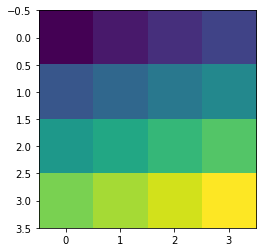

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

H = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12],
          [13, 14, 15, 16]])

plt.imshow(H, interpolation='none')
plt.show()

In [3]:
import random
random.seed(10)
import math
import numpy as np
import sys
import string
import matplotlib.pyplot as plt

In [41]:
def f(delta, x):
    return sum(x)/len(x)+delta*random.gauss(0,1)

def midpoint2d(maxlevel, sigma, H, addition=False):
    N = int(math.pow(2, maxlevel))
    X = [ [0]*(N+1) for x in range(N+1)]
    delta = sigma
    X[0][0] = delta*random.gauss(0,1)
    X[0][N] = delta*random.gauss(0,1)
    X[N][0] = delta*random.gauss(0,1)
    X[N][N] = delta*random.gauss(0,1)
    D = N
    d = int(N/2)
    for stage in range(1, maxlevel+1):
        delta = delta*math.pow(0.5, 0.5*H)
        for x in range(d, N-d+1, D):
            for y in range(d, N-d+1, D):
                X[x][y] = f(delta, [X[x+d][y+d], X[x+d][y-d],
                                    X[x-d][y+d], X[x-d][y-d]])
        if addition is True:
            for x in range(0, N+1, D):
                for y in range(0, N+1, D):
                    X[x][y] += delta*random.gauss(0, 1)
        delta = delta*math.pow(0.5, 0.5*H)
        for x in range(d, N-d+1, D):
            X[x][0] = f(delta,[X[x+d][0],X[x-d][0],X[x][d]])
            X[x][N] = f(delta,[X[x+d][N],X[x-d][N],X[x][N-d]])
            X[0][x] = f(delta,[X[0][x+d],X[0][x-d],X[d][x]])
            X[N][x] = f(delta,[X[N][x+d],X[N][x-d],X[N-d][x]])
        for x in range(d, N-d+1, D):
            for y in range(D, N-d+1, D):
                X[x][y] = f(delta, [X[x][y+d], X[x][y-d],
                                    X[x+d][y], X[x+d][y]])
        for x in range(D, N-d+1, D):
            for y in range(d, N-d+1, D):
                X[x][y] = f(delta, [X[x][y+d], X[x+d][y-d],
                                    X[x+d][y], X[x-d][y]])
        if addition is True:
            for x in range(0, N+1, D):
                for y in range(0, N+1, D):
                    X[x][y] += delta*random.gauss(0, 1)
            for x in range(d, N-d+1, D):
                for y in range(d, N-d+1, D):
                    X[x][y] += delta*random.gauss(0, 1)
        D = int(D/2)
        d = int(d/2)
    return X

In [73]:
maxlevel = 6
sigma = 0.5
H = 0.7
if len(sys.argv) == 4:
    maxlevel = string.atoi(sys.argv[1])
    sigma = string.atof(sys.argv[2])
    H = string.atof(sys.argv[3])
X = midpoint2d(maxlevel, sigma, H)
H = np.array(X)

In [74]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [75]:
H_scaled = NormalizeData(H)

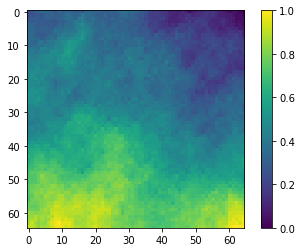

In [76]:
plt.imshow(H_scaled, interpolation='none')
plt.colorbar(orientation='vertical')
plt.show()

In [55]:
N = 65
np.random.seed(0)
H_random = np.random.random((N,N))

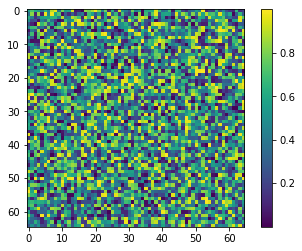

In [56]:
plt.imshow(H_random, interpolation='none')
plt.colorbar(orientation='vertical')
plt.show()

In [77]:
import pickle

In [78]:
dataGenerationPath = r'C:\Users\jiali\Desktop\choroMapThemeAnalysis\generateMaps'
with open(dataGenerationPath + '\\matrix_midpoint_scaled.pickle', 'wb') as f:
    pickle.dump(H_scaled,f)
with open(dataGenerationPath + '\\matrix_random.pickle', 'wb') as f:
    pickle.dump(H_random,f)

#### generate data with negative spatial autocorrelation

In [5]:
power = 6
size = 2**6 + 1
negAutoCorMatrix = np.zeros(shape=(size, size))
size

65

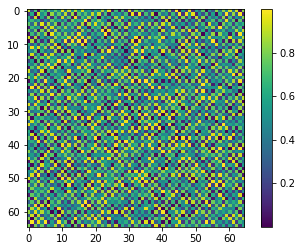

In [9]:
for i in range(size):
    for j in range(size):
        if (i + j) % 2 == 0:
            x = random.uniform(0.5, 1)
        else:
            x = random.uniform(0, 0.5)
        negAutoCorMatrix[i][j] = x
plt.imshow(negAutoCorMatrix, interpolation='none')
plt.colorbar(orientation='vertical')
plt.show()